# Lecture et écriture de fichiers

Dans le chapitre précédent, nous avons vu comment installer divers outils, tels que NiFi, Airfow, PostgreSQL et Elasticsearch. Dans ce chapitre, vous apprendrez à utiliser ces outils. L'une des tâches les plus élémentaires de l'ingénierie des données consiste à déplacer des données d'un fichier texte vers une base de données. 

Dans ce chapitre, vous allez lire et écrire des données dans plusieurs formats textuels diérents, tels que CSV et JSON.

Dans ce chapitre, nous allons couvrir les principaux sujets suivants :

* Lecture et écriture de fichiers en Python
* Traitement de fichiers dans Airflow
* Processeurs NiFi pour la gestion des fichiers
* Lecture et écriture de données dans des bases de données en Python
* Bases de données en Airflow
* Processeurs de base de données en NiFi

## Écrire et lire des fichiers en Python

 Le titre de cette section peut sembler étrange car vous êtes probablement habitué à le voir écrit comme lecture et écriture, mais dans cette section, vous écrirez d'abord des données dans des fichiers, puis les lirez. En l'écrivant, vous comprendrez la structure des données et vous saurez ce que vous essayez de lire.

Pour écrire des données, vous utiliserez une bibliothèque nommée faker. faker vous permet de créer facilement de fausses données pour des domaines communs. Vous pouvez générer une adresse en appelant simplement address(), ou un nom féminin en utilisant name_female(). Cela simplifiera la création de fausses données tout en la rendant plus réaliste. Pour installer faker, vous pouvez utiliser pip :

In [1]:
! pip3 install faker

     |████████████████████████████████| 1.2 MB 12.8 MB/s 


Avec faker maintenant installé, vous êtes prêt à commencer à écrire des fichiers. La section suivante commencera par les fichiers CSV

# L'écriture et la lecture de CSV

Le type de fichier le plus courant que vous rencontrerez sont des valeurs séparées par des virgules (CSV). Un CSV est un fichier composé de champs séparés par des virgules. Les virgules étant assez courantes dans le texte, vous devez pouvoir les gérer dans les fichiers CSV. Cela peut être accompli en utilisant des caractères d'échappement, généralement une paire de guillemets autour de chaînes de texte pouvant contenir une virgule qui n'est pas utilisée pour signifier un nouveau champ. Ces guillemets sont appelés caractères d'échappement. 

La bibliothèque standard Python pour la gestion des CSV simplifie le processus de gestion des données CSV.

## Écrire des CSV à l'aide de la bibliothèque CSV Python

Pour écrire un CSV avec la bibliothèque CSV, vous devez suivre les étapes suivantes :

* 1. Ouvrir un fichier en mode écriture. Pour ouvrir un fichier, vous devez spécifier un nom de fichier et un mode. Le mode d'écriture est w, mais vous pouvez également ouvrir un fichier pour lire avec r, ajouter avec a, ou lire et écrire avec r+. Enfin, si vous manipulez des fichiers qui ne sont pas du texte, vous pouvez ajouter b, pour le mode binaire, à l'un des modes précédents pour écrire en octets ; par exemple, wb vous permettra d'écrire en octets :

In [2]:
output = open('myCSV.CSV', mode='w')

* 2. Créez CSV_writer. Au minimum, vous devez spécifier un fichier dans lequel écrire, mais vous pouvez également transmettre des paramètres supplémentaires, tels qu'un dialecte. Un dialecte peut être un type CSV défini, tel qu'Excel, ou il peut s'agir d'options telles que le délimiteur à utiliser ou le niveau de guillemets. Les valeurs par défaut sont généralement ce dont vous aurez besoin ; par exemple, le délimiteur est par défaut une virgule (c'est un écrivain CSV après tout) et les guillemets sont par défaut QUOTE_MINIMAL, qui n'ajoutera des guillemets que lorsqu'il y a des caractères spéciaux ou le délimiteur dans un champ. Ainsi, vous pouvez créer le rédacteur comme indiqué :

In [4]:
import csv
mywriter=csv.writer(output)

* 3. Incluez un en-tête. Vous pourrez peut-être vous rappeler quels sont les champs dans votre fichier CSV, mais il est préférable d'inclure un en-tête. Écrire un en-tête revient à écrire n'importe quelle autre ligne : dénfnissez les valeurs, puis vous utiliserez writerow(), comme indiqué :

In [5]:
header=['name','age']
mywriter.writerow(header)

10

* 4. Écrivez les données dans un fichier. Vous pouvez maintenant écrire une ligne de données en utilisant writerow(0) et en passant des données, comme indiqué :

In [6]:
data=['Bob Smith',40]
mywriter.writerow(data)
output.close()

Maintenant, si vous regardez dans le répertoire, vous aurez un fichier CSV nommé myCSV.CSV et le contenu devrait ressemblera ceci

In [7]:
! cat myCSV.CSV

name,age
Bob Smith,40


Notez que lorsque vous avez utilisé cat pour afficher le fichier, les nouvelles lignes ont été ajoutées. Par défaut, CSV_writer utilise un retour et une nouvelle ligne ('\r\n')



L'exemple précédent était très basique. Cependant, si vous essayez d'écrire beaucoup de données, vous souhaiterez probablement parcourir une condition ou parcourir des données existantes. Dans l'exemple suivant, vous utiliserez Faker pour générer 1 000 enregistrements :




In [8]:
from faker import Faker
import csv

output=open('data.csv','w')
fake=Faker()

header=['name','age','street','city','state','zip','lng','lat']
mywriter=csv.writer(output)
mywriter.writerow(header)

for r in range(1000):
    mywriter.writerow([fake.name(),fake.random_int(min=18, max=80, step=1), fake.street_address(), fake.city(),fake.state(),fake.zipcode(),fake.longitude(),fake.latitude()])
output.close()


Vous devriez maintenant avoir un fichier data.CSV avec 1 000 lignes de noms et d'âges.Maintenant que vous avez écrit un fichier CSV, la section suivante vous guidera dans sa lecture en utilisant Python

## Lecture de CSV

Lire un CSV est assez similaire à en écrire un. Les mêmes étapes sont suivies avec de légères modications : 

* 1. Ouvrez un fichier à l'aide de with. L'utilisation de with a quelques avantages supplémentaires, mais pour l'instant, celui que vous récolterez n'est pas d'avoir à utiliser close() sur le fichier. Si vous ne spécifiez pas de mode, ouvrez les valeurs par défaut pour lire (r). Après l'ouverture, vous devrez spécifier sous quoi faire référence au fichier ; dans ce cas, vous ouvrirez le fichier data.CSV et vous y référerez comme f:


    with open('data.csv') as f:

* 2. Créez le lecteur. Au lieu d'utiliser simplement reader(), vous utiliserez DictReader(). En utilisant le lecteur de dictionnaire, vous pourrez appeler les champs des données par leur nom au lieu de leur position. Par exemple, au lieu d'appeler le premier élément d'une ligne en tant que ligne[0], vous pouvez désormais l'appeler en tant que ligne['nom']. Tout comme l'écrivain, les valeurs par défaut sont généralement suffisantes et vous n'aurez qu'à spécifier un fichier à lire. Le code suivant ouvre data.CSV en utilisant le nom de variable f


    myreader=CSV.DictReader(f)

* 3. Saisissez les en-têtes en lisant une seule ligne avec next() :


    headers=next(myreader)

* 4. Maintenant, vous pouvez parcourir le reste des lignes en utilisant les éléments suivants :


    for row in myreader:

* 5. Enfin, vous pouvez imprimer les noms en utilisant les éléments suivants :


    print(row['name'])

Vous ne devriez voir défiler que les 1 000 noms. Vous disposez maintenant d'un dictionnaire Python que vous pouvez manipuler comme bon vous semble. Il existe une autre façon de gérer les données CSV en Python et cela nécessite des pandas.




In [18]:
import csv


with open('/content/data.csv') as f:
  myreader=csv.DictReader(f)
  headers=next(myreader)
  for row in myreader:
    print(row['name'])

SyntaxError: ignored

## Lecture et écriture de CSV à l'aide de pandas DataFrames

Les DataFrames sont un outil puissant non seulement pour la lecture et l'écriture de données, mais également pour l'interrogation et la manipulation de données. Cela nécessite une surcharge plus importante que la bibliothèque CSV intégrée, mais il y a des moments où cela peut valoir le compromis. Vous avez peut-être déjà installé pandas, selon votre environnement Python, mais si ce n'est pas le cas, vous pouvez l'installer avec les éléments suivants :


    pip install pandas

Vous pouvez considérer un DataFrame pandas comme une feuille Excel ou un tableau. Vous aurez des lignes, des colonnes et un index. Pour charger des données CSV dans un DataFrame, les étapes suivantes doivent être suivies :


* 1. Importez des pandas (généralement en tant que pd) :



In [19]:
import pandas as pd

* 2. Ensuite, lisez le fichier en utilisant read_csv(). La méthode read_csv() prend plusieurs paramètres facultatifs et un paramètre obligatoire – le fichier ou un tampon de type fichier. Les deux paramètres facultatifs qui peuvent être intéressants sont l'en-tête, qui par défaut tente d'inférer les en-têtes. Si vous définissez header=0, vous pouvez utiliser le paramètre names avec un tableau de noms de colonnes. Si vous avez un gros fichier et que vous voulez juste en regarder une partie, vous pouvez utiliser nrows pour spécifier le nombre de lignes à lire, donc nrows=100 signifie qu'il ne lira que 100 lignes pour les données. Dans l'extrait suivant, vous allez charger l'intégralité du chier en utilisant les valeurs par défa

In [24]:
df=pd.read_csv('/content/data.csv')

* 3. Regardons maintenant les 10 premiers enregistrements en utilisant ce qui suit :

In [25]:
df.head(10)

name  age  ...         lng        lat
0        Amy Gregory   41  ...   42.952885  87.405998
1      Micheal Davis   20  ... -165.792055 -74.468074
2        Brian Gomez   65  ... -149.193639 -81.870412
3          Larry Fox   50  ... -103.147105 -14.392145
4  Johnathan Daniels   74  ...  155.393474   5.407771
5  Stacey Mooney DVM   67  ...  -35.196976 -47.025041
6      Patricia Mora   40  ...  -68.294343 -18.266356
7    Marilyn Stewart   51  ... -169.983016   4.170958
8      Carolyn Clark   67  ...  -55.199269  54.368125
9       Lee Peterson   45  ...  -56.972505  49.191585

[10 rows x 8 columns]

Vous pouvez créer un DataFrame en Python en procédant comme suit :


* 1. Créez un dictionnaire de données. Un dictionnaire est une structure de données qui stocke les données sous la forme d'une paire clé:valeur. La valeur peut être de n'importe quel type de données Python, par exemple un tableau. Les dictionnaires ont des méthodes pour trouver les clés(), les valeurs() et les éléments(). Ils vous permettent également de trouver la valeur d'une clé en utilisant le nom de la clé entre parenthèses – par exemple, Dictionary['key'] renverra la valeur de cette clé :

In [26]:
data={
      'Name':['Paul','Bob','Susan','Yolanda'],
      'Age':[23,45,18,21]
    }

2. Transmettez les données au DataFrame :

In [27]:
df=pd.DataFrame(data)

* 3. Les colonnes sont spéciées comme les clés du dictionnaire. Maintenant que vous avez un DataFrame, vous pouvez écrire le contenu dans un fichier CSV en utilisant to_csv() et en passant un nom de fichier. Dans l'exemple, nous n'avons pas défini d'index, ce qui signifie que les noms de ligne seront un nombre de 0 à n, où n est la longueur du DataFrame. Lorsque vous exportez au format CSV, ces valeurs seront écrites dans le fichier, mais le nom de la colonne sera vide. Ainsi, dans le cas où vous n'avez pas besoin que les noms de lignes ou l'index soient écrits dans le fichier, transmettez le paramètre d'index à to_csv(), comme indiqué :

In [28]:
df.to_csv('fromdf.CSV',index=False)

Vous aurez maintenant un fichier CSV avec le contenu du DataFrame. La façon dont nous pouvons utiliser le contenu de ce DataFrame pour exécuter des requêtes SQL sera abordée dans le chapitre suivant. Ils deviendront un outil important dans votre boîte à outils et le reste du livre s'appuiera fortement sur eux. Pour l'instant, passons à la section suivante, où vous découvrirez un autre format de texte courant - JSON

## Écriture de JSON avec Python

Un autre format de données commun que vous traiterez probablement est la notation d'objets JavaScript (JSON). Vous verrez JSON le plus souvent lors des appels aux interfaces de programmation d'applications (API) ; cependant, il peut également exister en tant que fichier. La façon dont vous gérez les données est très similaire, que vous les lisez à partir d'un fichier ou d'une API. Python, comme vous l'avez appris avec CSV, possède une bibliothèque standard pour gérer les données JSON, sans surprise nommée JSON-JSON

Pour écrire JSON à l'aide de Python et de la bibliothèque standard, les étapes suivantes doivent être respectées :

* 1. Importez la bibliothèque et ouvrez le fichier dans lequel vous allez écrire. Vous créez également l'objet Faker :

In [36]:
from faker import Faker
import json

output=open('data.JSON','w')
fake=Faker()

* 2. Nous allons créer 1 000 enregistrements, comme nous l'avons fait dans l'exemple CSV, vous devrez donc créer un dictionnaire pour contenir les données. Comme mentionné précédemment, la valeur d'une clé peut être n'importe quel type de données Python, y compris un tableau de valeurs. Après avoir créé le dictionnaire pour contenir les enregistrements, ajoutez une clé « records » et initialisez-la avec un tableau vide, comme indiqué :

In [37]:
alldata={}
alldata['records']=[]

* 3. Pour écrire les enregistrements, vous utilisez Faker pour créer un dictionnaire, puis l'ajoutez au tableau :

In [38]:
for x in range(1000):
	data={"name":fake.name(),"age":fake.random_int(min=18, max=80, step=1),"street":fake.street_address(),"city":fake.city(),"state":fake.state(),"zip":fake.zipcode(),"lng":float(fake.longitude()),"lat":float(fake.latitude())}
	alldata['records'].append(data)	


4. Enfin, pour écrire le JSON dans un fichier, utilisez la méthode JSON.dump(). Transmettez les données que vous souhaitez écrire et un fichier dans lequel écrire :

In [39]:
json.dump(alldata,output)

Vous disposez maintenant d'un fichier data.JSON qui contient un tableau de 1 000 enregistrements. Vous pouvez lire ce chier en procédant comme suit :

1. Ouvrez le chier à l'aide des éléments suivants :

    with open("data.JSON","r") as f:

2. Utilisez JSON.load() et transmettez la référence de fichier à la méthode :

    data=json.load(f)

3. Inspectez le json en examinant le premier enregistrement à l'aide des éléments suivants :


    data['records'][0]


Ou utilisez simplement le nom :


      data['records'][0]['name']

Lorsque vous chargez et videz JSON, assurez-vous de ne pas ajouter de s à la fin des termes JSON. les charges et les décharges sont difiérentes que les charges et les décharges. Les deux sont des méthodes valides de la bibliothèque JSON. La différence est que les chargements et les vidages sont pour les chaînes - ils ne sérialisent pas le JSON.


  

## pandas DataFrames

Lire et écrire JSON avec DataFrames est similaire à ce que nous avons fait avec CSV. La seule différence est que vous changez to_csv en to_json() et read_csv() en read_json(). Si vous disposez d'un fichier JSON propre et bien formaté, vous pouvez le lire à l'aide du code suivant :


    df=pd.read_json('data.JSON')


Dans le cas du fichier data.JSON, les enregistrements sont imbriqués dans un dictionnaire d'enregistrements. Ainsi, le chargement du JSON n'est pas aussi simple que le code précédent. Vous aurez besoin de quelques étapes supplémentaires, qui sont les suivantes. Pour charger des données JSON à partir du fichier, procédez comme suit : 

1. Utilisez la bibliothèque JSON pandas :

In [41]:
import pandas.io.json as pd_JSON

2. Ouvrez le fichier et chargez-le avec la version pandas de JSON.loads() :


    f=open('/content/data.JSON','r')
    data=pd_JSON.loads(f.read())

3. Pour créer le DataFrame, vous devez normaliser le JSON. La normalisation est la façon dont vous pouvez aplatir le JSON pour qu'il tienne dans un tableau. Dans ce cas, vous souhaitez récupérer les enregistrements JSON individuels contenus dans le dictionnaire d'enregistrements. Passez ce chemin - records - au paramètre record_path de json_normalize () :


    f=pd_JSON.json_normalize(data,record_path='records')

Vous aurez maintenant un DataFrame qui contient tous les enregistrements du fichier data.JSON. Vous pouvez maintenant les réécrire dans JSON ou CSV à l'aide de DataFrames. 

Lors de l'écriture dans JSON, vous pouvez transmettre le paramètre orient, qui détermine le format du JSON renvoyé. La valeur par défaut est des colonnes, qui pour le fichier data.JSON que vous avez créé dans la section précédente ressembleraient aux données suivantes :


    df.head(2).to_json()


En modifiant la valeur orient en records, vous obtenez chaque ligne en tant qu'enregistrement dans le JSON




Je trouve que travailler avec JSON orienté autour des enregistrements rend son traitement dans des outils tels que Airflow beaucoup plus facile que JSON dans d'autres formats, tels que fractionnement, index, colonnes, valeurs ou table. Maintenant que vous savez comment gérer les fichiers CSV et JSON en Python, il est temps d'apprendre à combiner des tâches dans un pipeline de données à l'aide d'Airflow et NiFi. Dans la section suivante, vous apprendrez à créer des pipelines dans Apache Airflow.


## Construire des pipelines de données dans Apache Airflow

Apache Airflow utilise des fonctions Python, ainsi que Bash ou d'autres opérateurs, pour créer des tâches qui peuvent être combinées dans un graphe acyclique dirigé (DAG), ce qui signifie que chaque tâche se déplace dans une direction une fois terminée. Airflow vous permet de combiner des fonctions Python pour créer des tâches. Vous pouvez spécifier l'ordre dans lequel les tâches seront exécutées et quelles tâches dépendent des autres. Cet ordre et cette dépendance en font un DAG. Ensuite, vous pouvez programmer votre DAG dans Airflow pour spécifier quand et à quelle fréquence votre DAG doit s'exécuter. À l'aide de l'interface graphique Airflow, vous pouvez surveiller et gérer votre DAG. En utilisant ce que vous avez appris dans les sections précédentes, vous allez maintenant créer un pipeline de données dans Airflow.

## Construire un CSV vers un pipeline de données JSON 

Commencer par un simple DAG vous aidera à comprendre comment fonctionne Airflow et vous aidera à ajouter plus de fonctions pour créer un meilleur pipeline de données. Le DAG que vous construisez imprimera un message à l'aide de Bash, puis lira le CSV et imprimera une liste de tous les noms. Les étapes suivantes vous guideront tout au long de la création du pipeline de données : 

1. Ouvrez un nouveau fichier à l'aide de l'IDE Python ou de n'importe quel éditeur de texte. Importez les bibliothèques requises, comme indiqué :




    import datetime as dt
    from datetime import timedelta

    from airflow import DAG
    from airflow.operators.bash_operator import BashOperator
    from airflow.operators.python_operator import PythonOperator

    import pandas as pd


Les deux premières importations apportent datetime et timedelta. Ces bibliothèques sont utilisées pour planifier le DAG. Les trois importations Airflow apportent les bibliothèques requises pour créer le DAG et utiliser les opérateurs Bash et Python. Ce sont les opérateurs que vous utiliserez pour créer des tâches. Enfin, vous importez des pandas afin de pouvoir facilement convertir entre CSV et JSON.


2. Ensuite, écrivez une fonction pour lire un fichier CSV et imprimez les noms. En combinant les étapes de lecture des données CSV et d'écriture des données JSON des sections précédentes, vous pouvez créer une fonction qui lit le fichier data.CSV et l'écrit dans JSON, comme indiqué dans le code suivant :


    def csvToJson():
        df=pd.read_csv('/home/paulcrickard/data.csv')
        for i,r in df.iterrows():
            print(r['name'])
        df.to_json('fromAirflow.json',orient='records')

Cette fonction ouvre le fichier dans un DataFrame. ensuite, il parcourt les lignes, n'imprimant que les noms, et enfin, il écrit le CSV dans un fichier JSON



3. Maintenant, vous devez implémenter la partie Airflow du pipeline. Spécifiez les arguments qui seront passés à DAG(). Dans ce guide, vous utiliserez un ensemble minimal de paramètres. Les arguments de cet exemple attribuent un propriétaire, une date de début, le nombre de tentatives en cas d'échec et combien de temps attendre avant de réessayer. Ils sont indiqués dans le dictionnaire suivant:


    default_args = {
        'owner': 'paulcrickard',
        'start_date': dt.datetime(2020, 3, 18),
        'retries': 1,
        'retry_delay': dt.timedelta(minutes=5),
    }

4. Ensuite, transmettez le dictionnaire d'arguments à DAG(). Créez l'ID DAG, qui est défini sur MyCSVDAG, le dictionnaire d'arguments (la variable default_args dans le code précédent) et l'intervalle de planification (comment exécuter le pipeline de données). L'intervalle de planification peut être défini à l'aide de timedelts, ou vous pouvez utiliser un format crontab avec les préréglages ou crontab suivants :



a) @once

b) @hourly – 0 * * * *

c) @daily – 0 0 * * *

d) @weekly – 0 0 * * 0

e) @monthly – 0 0 1 * *

f) @yearly – 0 0 1 1 *


crontab utilise le format minute, hour, day of month, month, day of week. La valeur pour @yearly est 0 0 1 1 *, ce qui signifie qu'elle s'exécute annuellement le 1er janvier (1 1), à 0:0 (minuit), n'importe quel jour de la semaine (*).


    Planification d'un avertissement DAG la variable start_date d'un DAG est
    start_date + schedule_interval. Cela signifie que si vous planifiez un DAG
    avec une valeur start_date d'aujourd'hui et une valeur schedule_interval de
    daily, le DAG ne s'exécutera pas avant demain.


Le DAG est créé avec le code suivant :


    with DAG('MyCSVDAG',
         default_args=default_args,
         schedule_interval=timedelta(minutes=5),      # '0 * * * *',
         ) as dag:
  
5. Vous pouvez maintenant créer vos tâches à l'aide d'opérateurs. Airflow a plusieurs opérateurs prédéfinis. Vous pouvez les voir tous dans la documentation à l'adresse https://airflow.apache.org/docs/stable/_api/airflow/operators/index.html. Dans ce guide, vous utiliserez principalement les opérateurs Bash, Python et Postgres. Les opérateurs vous permettent de supprimer la plupart du code passe-partout requis pour effectuer des tâches courantes. Dans l'extrait suivant, vous allez créer deux tâches à l'aide des opérateurs Bash et Python :



     print_starting = BashOperator(task_id='starting',
                               bash_command='echo "I am reading the CSV now....."')
    
    csvJson = PythonOperator(task_id='convertCSVtoJson',
                                 python_callable=csvToJson)


L'extrait précédent crée une tâche à l'aide de l'opérateur BashOperator, qui imprime une instruction pour vous informer qu'elle est en cours d'exécution. Cette tâche ne sert à rien d'autre que de vous permettre de voir comment connecter plusieurs tâches entre elles. La tâche suivante, CSVJson, utilise l'opérateur PythonOperator pour appeler la fonction que vous avez définie au début du fichier (CSVToJson()). La fonction lit le fichier data.CSV et imprime le nom du champ dans chaque ligne.


6. Une fois les tâches définies, vous devez maintenant établir les liens entre les tâches. Vous pouvez le faire en utilisant les méthodes set_upstream() et set_downstream() ou avec l'opérateur bit shit. En utilisant l'amont et l'aval, vous pouvez faire passer le graphique de la tâche Bash à la tâche Python en utilisant l'un des deux extraits de code ; ce qui suit est le premier extrait :


    print_starting .set_downstream(CSVJson)

Voici le deuxième extrait :

    CSVJson.set_upstream(print_starting)

En utilisant l'opérateur bit shit, vous pouvez faire la même chose ; ce qui suit est la première option :

    print_starting >>  CSVJson

Voici la deuxième option :


    CSVJson << print_starting


    Remarque

    La méthode que vous choisissez dépend de vous ; Cependant, vous devez être
    cohérent. Dans ce guide, vous verrez l'opérateur bit shit régler l'aval.


7. Pour utiliser Airfow et Scheduler dans l'interface graphique, vous devez d'abord créer un répertoire pour vos DAG. Lors de l'installation et de la configuration d'Apache Airfow, dans le chapitre précédent, nous avons supprimé les exemples et le répertoire DAG est donc manquant. Si vous regardez airflow.cfg, vous verrez le paramètre pour dags_folder. Il est au format $AIRFLOW_HOME/dags. Sur ma machine, $AIRFLOW_HOME est home/paulcrickard/airflow. Il s'agit du répertoire dans lequel vous allez créer le fichier de configuration dags folder.e indiquant où doit se trouver le dossier.



8. Copiez votre code DAG dans le dossier, puis exécutez la commande suivante :


    airflow webserver
    airflow scheduler

9. Lancez l'interface graphique en ouvrant votre navigateur Web et en allant sur http://localhost:8080. Vous verrez votre DAG, comme illustré dans la capture d'écran suivante :

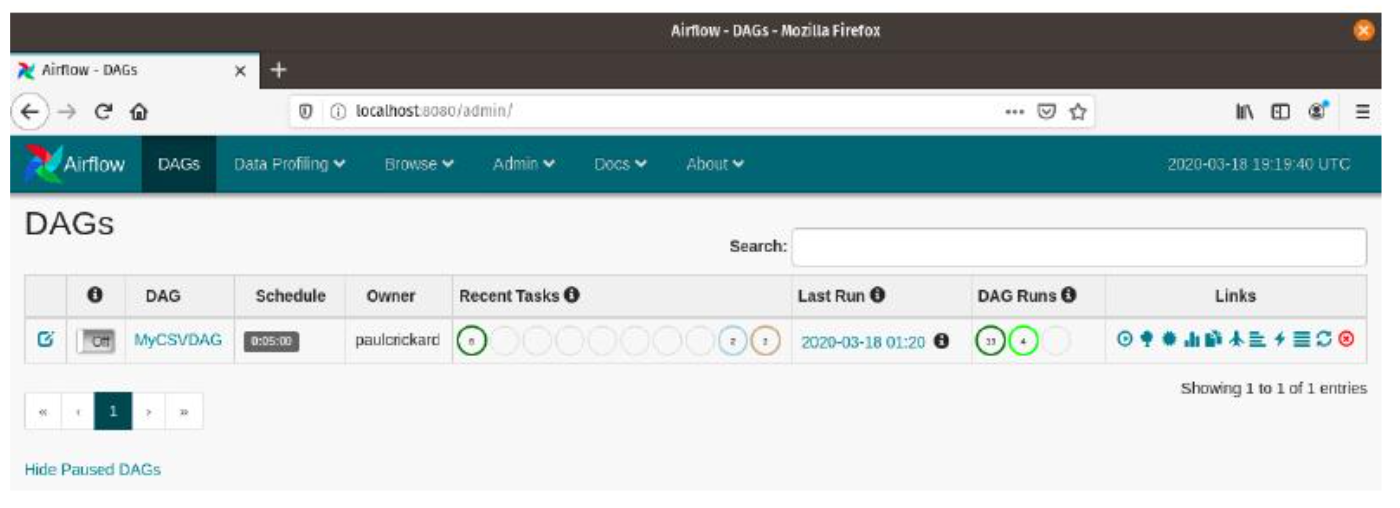

10. Cliquez sur DAG et sélectionnez Tree View. Activez le DAG, puis cliquez sur GO. Lorsque les tâches commencent à s'exécuter, vous verrez l'état de chaque exécution, comme illustré dans la capture d'écran suivante :


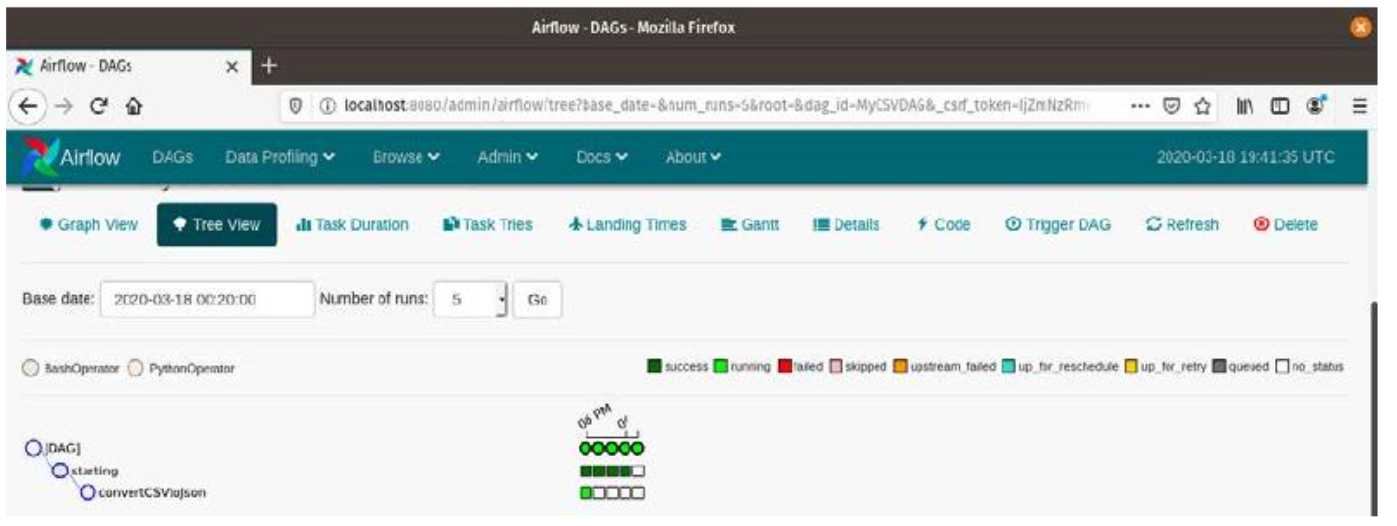

11. Vous verrez qu'il y a eu des exécutions réussies - chaque tâche s'est exécutée et l'a fait avec succès. Mais il n'y a pas de sortie ou de résultats. Pour voir les résultats, cliquez sur l'un des carrés complétés, comme illustré dans la capture d'écran suivante :

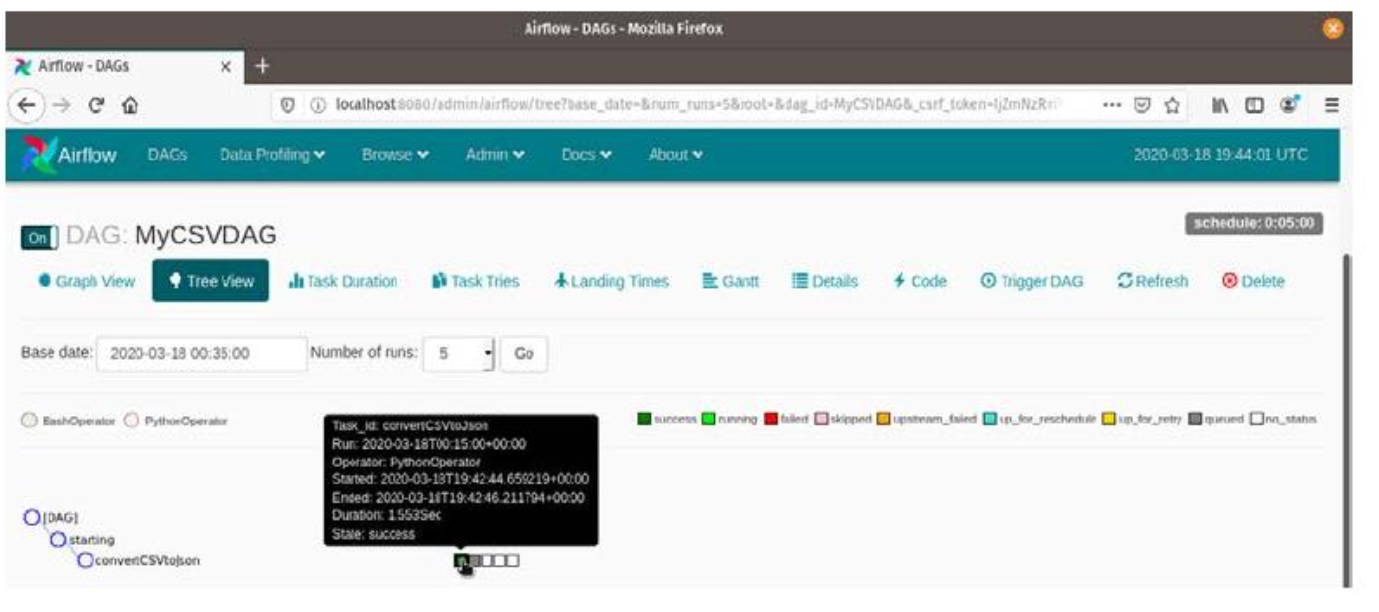

12. Vous verrez une fenêtre contextuelle avec plusieurs options. Cliquez sur le bouton View Log, comme illustré dans la capture d'écran suivante :

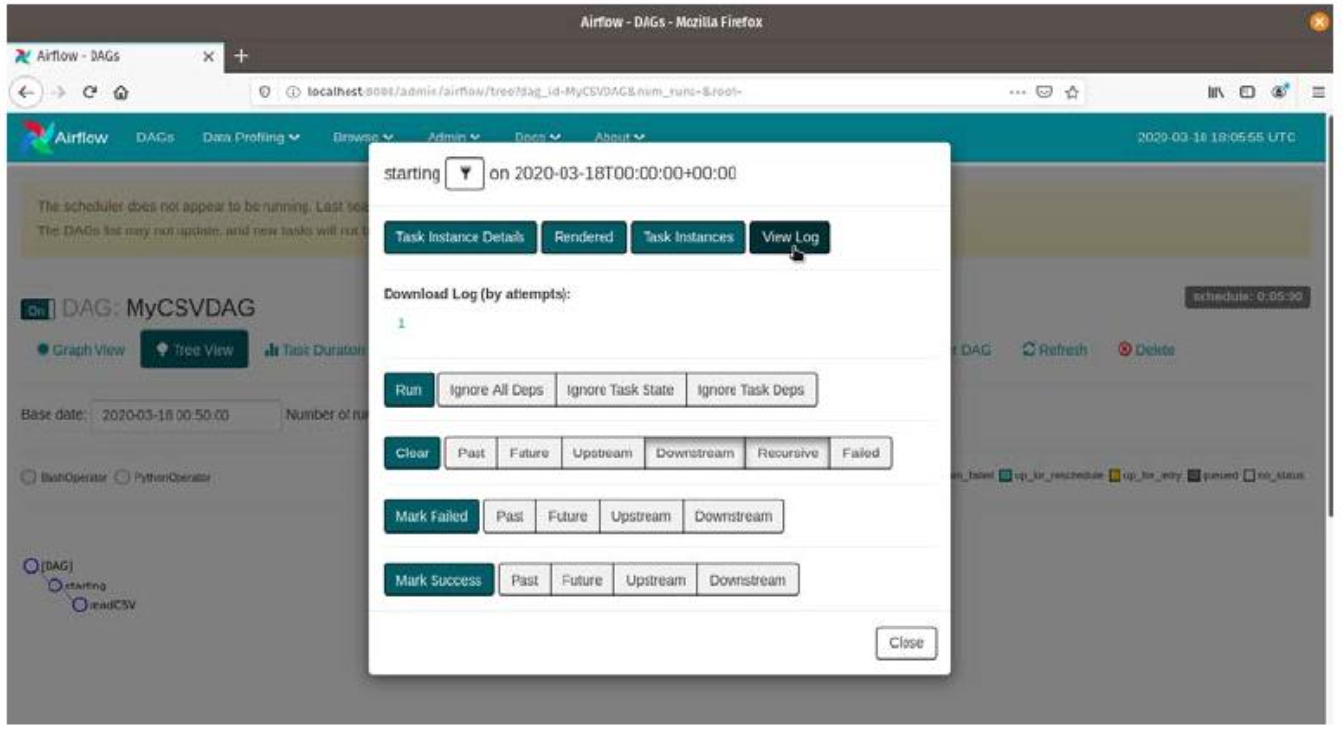

13. Vous serez redirigé vers l'écran de journal de la tâche. En regardant une exécution réussie de la tâche CSV, vous devriez voir un fichier journal similaire à celui de la capture d'écran suivante :


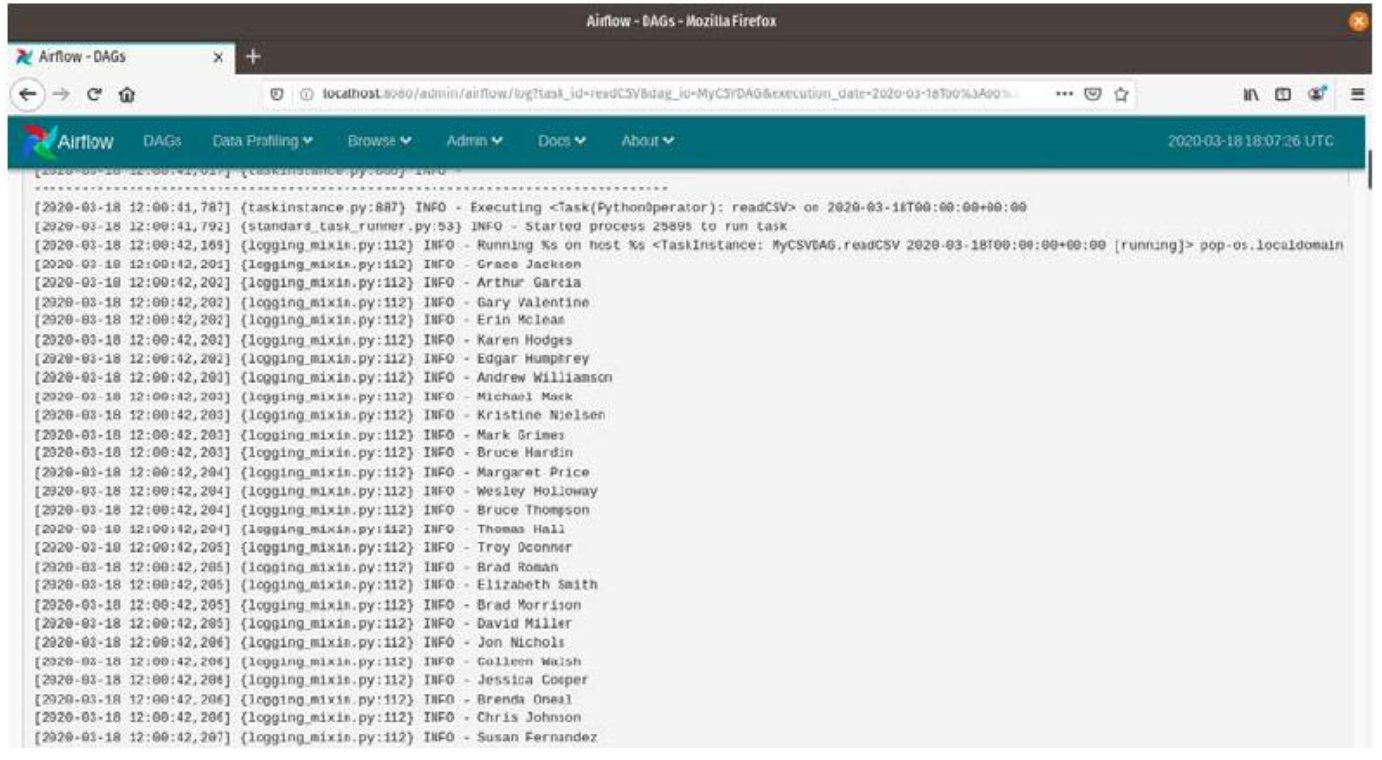

Toutes nos félicitations! Vous avez créé un pipeline de données avec Python et l'avez exécuté dans Airflow. Le résultat de votre pipeline est un fichier JSON dans votre répertoire dags qui a été créé à partir de votre fichier data.CSV. Vous pouvez le laisser s'exécuter et il continuera à s'exécuter à l'heure de schedule_interval spéciée. Construire des pipelines plus avancés vous demandera seulement d'écrire plus de fonctions et de les connecter avec le même processus. Mais avant de passer à des techniques plus avancées, vous devrez apprendre à utiliser Apache NiFi pour créer des pipelines de données.

## Gestion des chiers à l'aide de processeurs NiFi

Dans les sections précédentes, vous avez appris à lire et à écrire des chiers CSV et JSON à l'aide de Python. La lecture de fichiers est une tâche si courante que des outils tels que NiFi ont des processeurs prédéfinis pour la gérer. Dans cette section, vous apprendrez à gérer les fichiers à l'aide de processeurs NiFi.

# Travailler avec CSV dans NiFi

Travailler avec des fichiers dans NiFi nécessite beaucoup plus d'étapes que celles que vous deviez utiliser pour effectuer les mêmes tâches en Python. Il y a des avantages à utiliser plus d'étapes et à utiliser NiFI, y compris que quelqu'un qui ne connaît pas le code peut regarder votre pipeline de données et comprendre ce que vous faites. Vous trouverez peut-être même plus facile de vous rappeler ce que vous essayiez de faire lorsque vous reviendrez à votre pipeline à l'avenir. De plus, les modifications apportées au pipeline de données ne nécessitent pas de refactoriser beaucoup de code ; vous pouvez plutôt réorganiser les processeurs par glisser-déposer. Dans cette section, vous allez créer un pipeline de données qui lit le fichier data.CSV que vous avez créé en Python. Il exécutera une requête pour les personnes de plus de 40 ans, puis écrira cet enregistrement dans un fichier. Le résultat de cette section est illustré dans la capture d'écran suivante :

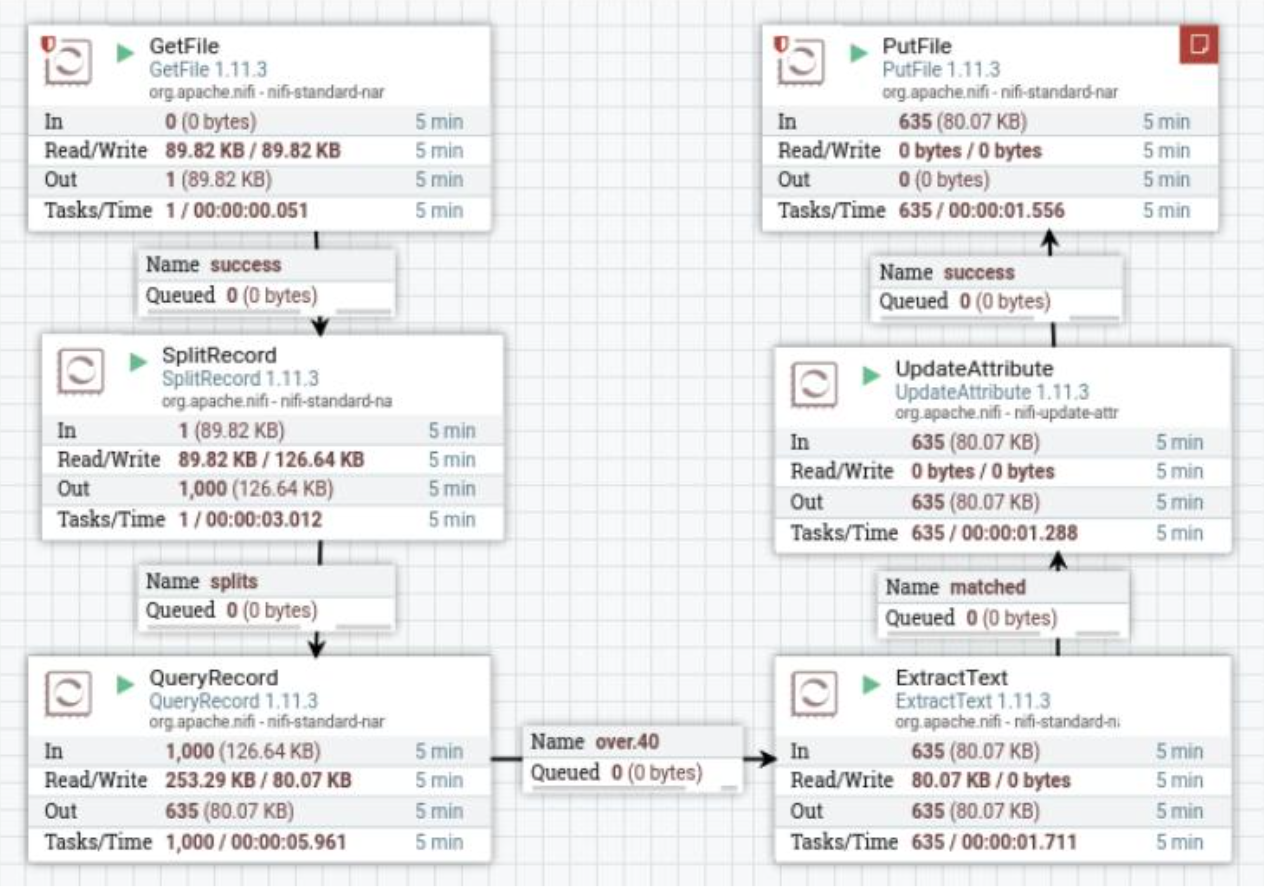

Les sections suivantes vous guideront tout au long de la création d'un pipeline de données.

## Lire un fichier avec GetFile 

La première étape de votre pipeline de données consiste à lire le fichier data.csv. Pour ce faire, procédez comme suit :

1. Faites glisser l'icône Processeur de la barre d'outils NiFi vers le canevas. Recherchez GetFile, puis sélectionnez-le.

2. Pour configurer le processeur GetFile, vous devez spécifier le répertoire d'entrée. Dans les exemples Python plus haut dans ce chapitre, j'ai écrit le fichier data.CSV dans mon répertoire personnel, qui est home/paulcrickard, c'est donc ce que j'utiliserai pour le répertoire d'entrée. 

3. Ensuite, vous devrez spécifier file filter. Ce champ autorise le langage d'expression NiFi, vous pouvez donc utiliser des expressions régulières (regex) et spécifier n'importe quel fichier se terminant par CSV  – [^\.].*\.CSV - mais pour cet exemple, vous pouvez simplement définir la valeur à data.csv. 

4. Enfin, la propriété Keep Source File doit être définie sur true. Si vous le laissez comme faux, NiFi supprimera le fichier une fois qu'il l'aura traité. La configuration complète est illustrée dans la capture d'écran suivante :

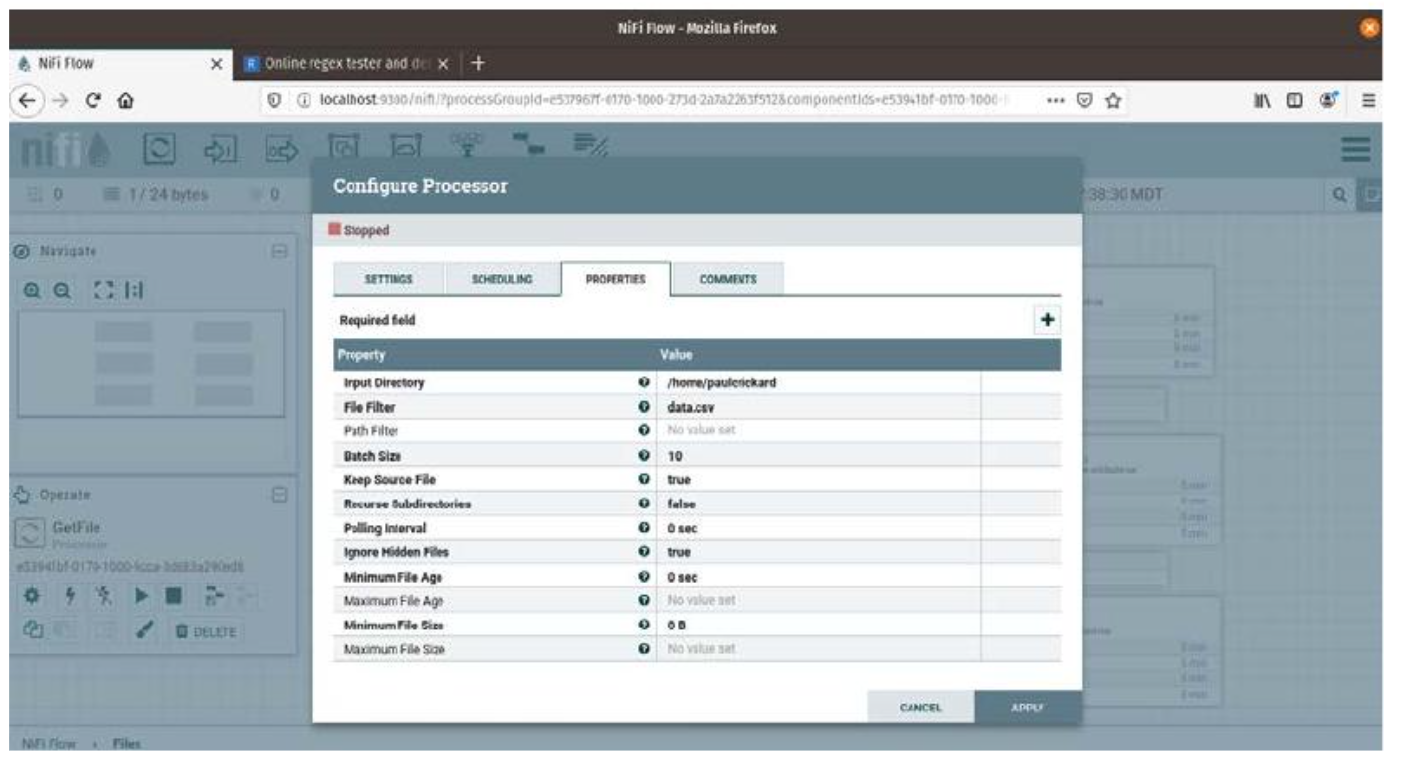

# Fractionnement des enregistrements en flux distincts

Vous pouvez désormais transmettre la relation de réussite du processeur GetFile au processeur SplitRecord:

1. Le processeur SplitRecord vous permettra de séparer chaque ligne dans un ux distinct. Faites-le glisser et déposez-le sur le canevas. Vous devez créer un lecteur de disques et un graveur de disques – NiFi en a déjà plusieurs que vous pouvez configurer. Cliquez sur la case à côté de Record Reader et sélectionnez  Create new service, comme illustré dans la capture d'écran suivante :

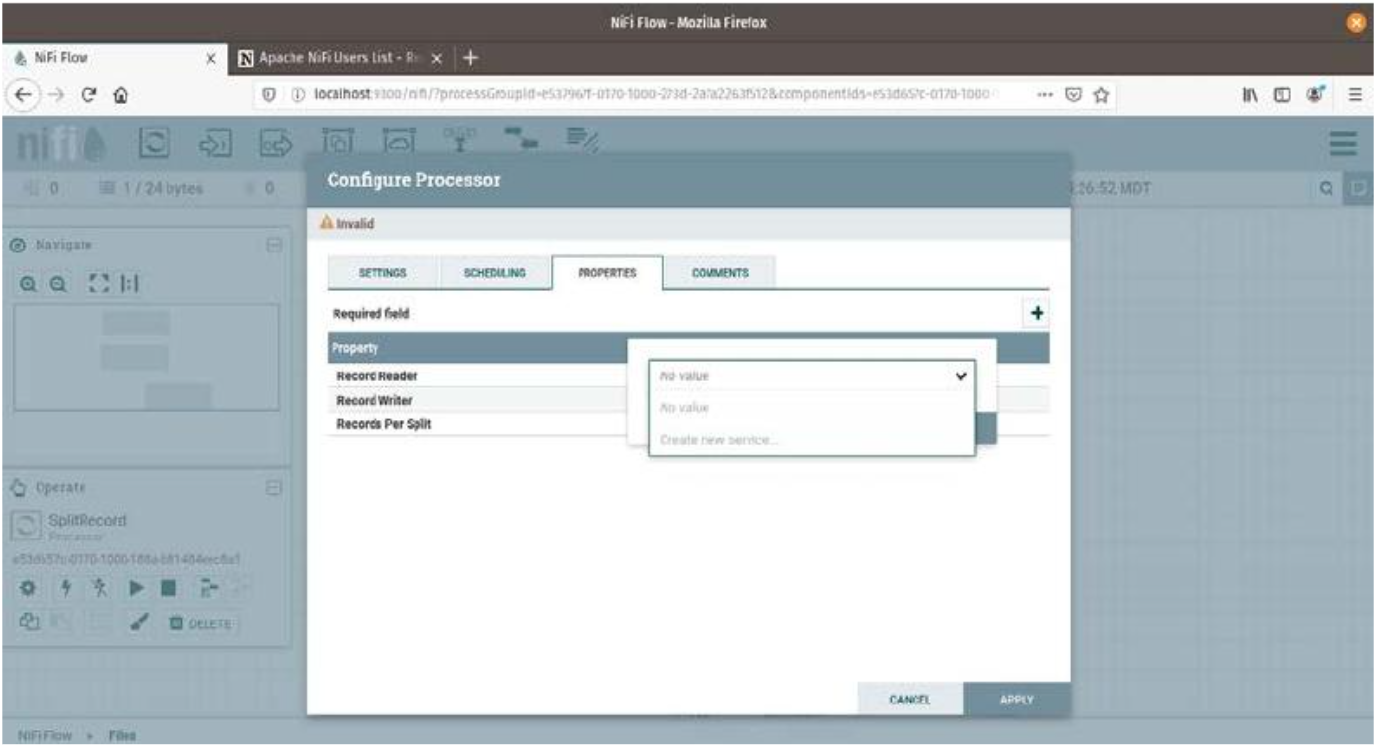

2. Vous devrez choisir le type de lecteur. Sélectionnez CSVReader dans la liste déroulante. Sélectionnez le menu déroulant pour Record Writer et choisissez CSVRecordSetWriter

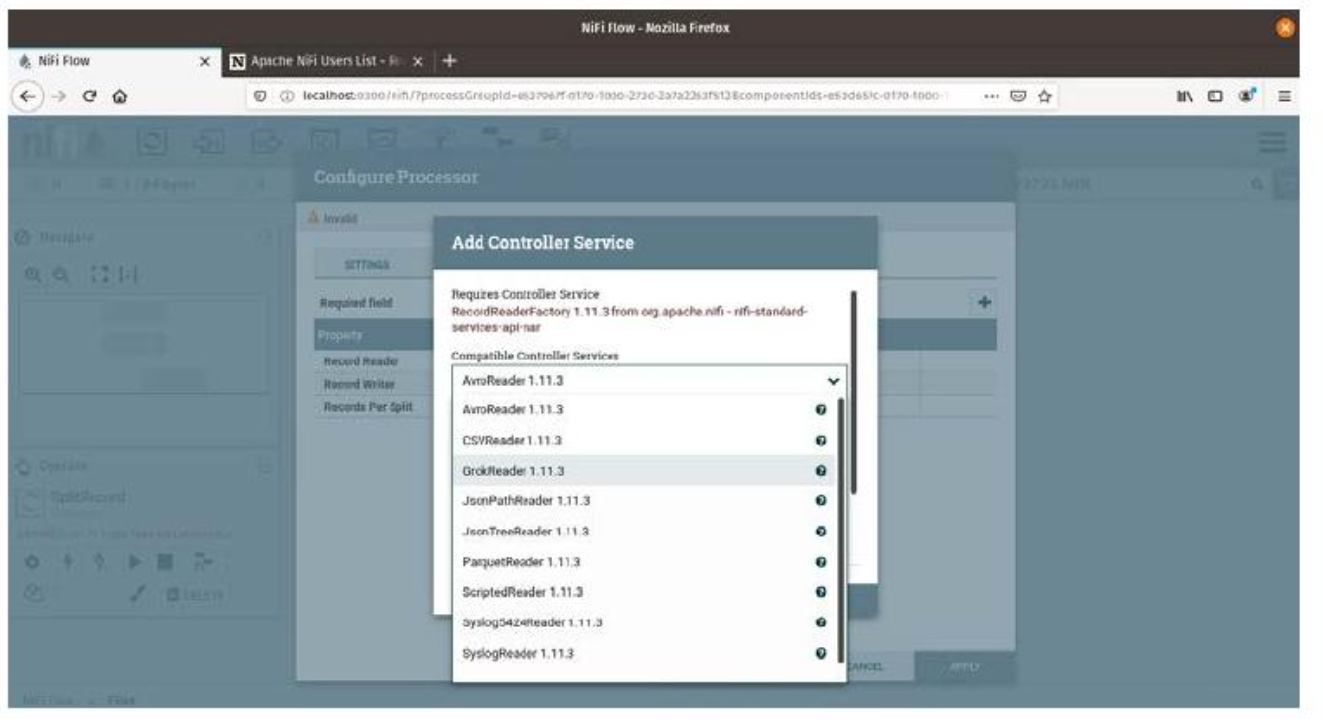

3. Pour configurer CSVReader et CSVRecordSetWriter, cliquez sur la flèche à droite de l'un ou l'autre. Cela ouvrira la fenêtre de configuration des fichiers dans l'onglet SERVICES DU CONTRLEUR. Vous verrez l'écran illustré dans la capture d'écran suivante :

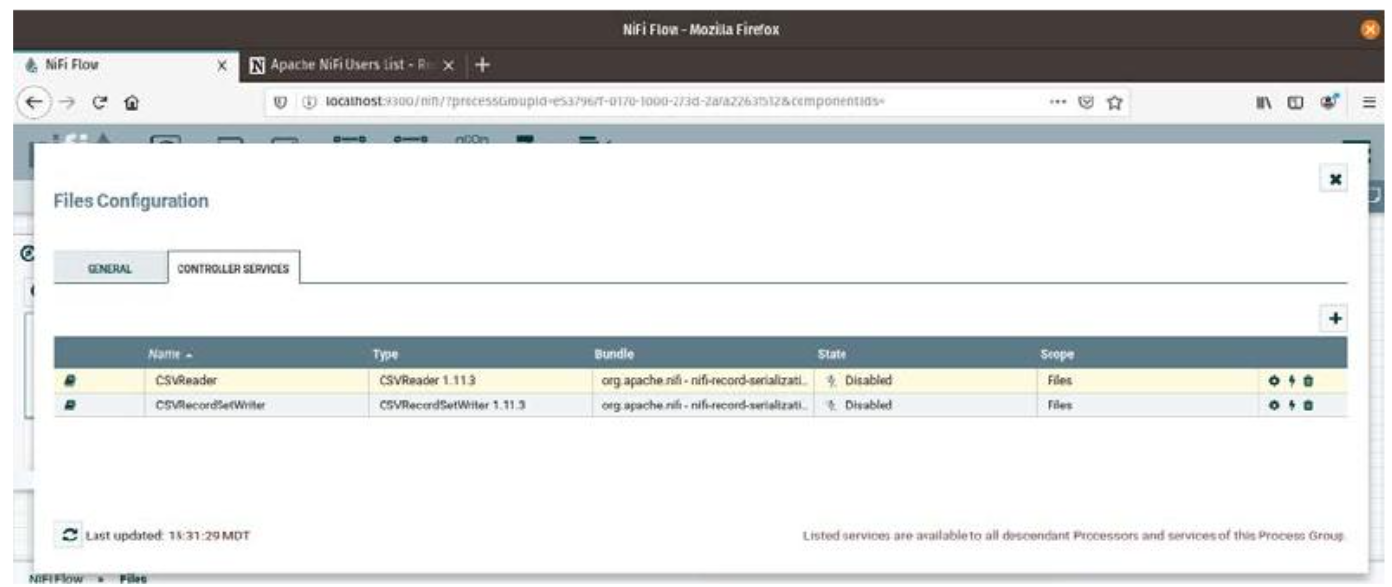

Les trois icônes à droite sont les suivantes : 

* Un engrenage pour les réglages 

* Un éclair pour activer et désactiver le service (il est actuellement désactivé) 

* Une poubelle pour le supprimer


Sélectionnez l'équipement pour CSVReader. La configuration par défaut fonctionnera, à l'exception de la propriété Traiter la première ligne comme en-tête, qui doit être définie sur true. Cliquez sur l'engrenage pour CSVRecordSetWriter et vous pouvez voir les propriétés disponibles. Les valeurs par défaut sont susantes dans cet exemple. Maintenant, cliquez sur l'éclair pour activer les services.


## Filtrage des enregistrements avec le processeur QueryRecord

Vous disposez maintenant d'un pipeline qui lira un fichier CSV et divisera les lignes en ux individuels. Vous pouvez maintenant traiter chaque ligne avec le processeur QueryRecord. 

Ce processeur vous permettra d'exécuter une commande SQL sur le fowfile. Le contenu du nouveau ux sera le résultat de la requête SQL. Dans cet exemple, vous sélectionnerez tous les enregistrements dont l'âge de la personne est supérieur à 40 : 

1. Faites glisser et déposez le processeur QueryRecord sur le canevas. Pour interroger le owle, vous devez spécifier un lecteur et un rédacteur d'enregistrement. Vous en avez déjà créé un et ils sont maintenant disponibles dans la liste déroulante. La propriété Inclure Zero Record FlowFiles doit être définie sur false. Cette propriété acheminera les enregistrements qui ne répondent pas aux critères vers la même relation (ce que vous ne voulez pas). 

2. Enfin, cliquez sur le signe plus dans le coin droit et spécifiez un nom de propriété dans la fenêtre contextuelle. Le nom de la propriété deviendra une relation lorsque vous créerez une connexion à partir de ce processeur. Nommez la propriété over.40. Ensuite, la fenêtre contextuelle de valeur apparaîtra. C'est là que vous entrerez la requête SQL. Les résultats de la requête deviendront le contenu du ux. Puisque vous voulez les dossiers des personnes de plus de 40 ans, la requête est la suivante


      Select * from FlowFile where age > 40


La requête Select * est ce qui renvoie l'intégralité du owle. Si vous souhaitez uniquement le nom de la personne et que le champ soit full_name, vous pouvez exécuter le SQL suivant :


      Select name as full_name from FlowFile where age > 40

Le point que j'essaie de faire comprendre ici est que vous pouvez exécuter SQL et modifier le owle en quelque chose d'autre que le contenu de la ligne - par exemple, l'exécution et l'agrégation et un groupe par.
    